In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [ ]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [ ]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0.0


In [ ]:
df.shape


(13395, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13395 entries, 0 to 13394
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  13395 non-null  int64  
 1   h1n1_worry                 13352 non-null  float64
 2   h1n1_awareness             13338 non-null  float64
 3   antiviral_medication       13360 non-null  float64
 4   contact_avoidance          13279 non-null  float64
 5   bought_face_mask           13386 non-null  float64
 6   wash_hands_frequently      13379 non-null  float64
 7   avoid_large_gatherings     13351 non-null  float64
 8   reduced_outside_home_cont  13349 non-null  float64
 9   avoid_touch_face           13335 non-null  float64
 10  dr_recc_h1n1_vacc          12334 non-null  float64
 11  dr_recc_seasonal_vacc      12334 non-null  float64
 12  chronic_medic_condition    12918 non-null  float64
 13  cont_child_undr_6_mnths    12984 non-null  flo

In [ ]:
for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:

    # use .astype() to change the data type
    df[col] = df[col].astype('object')

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                    object
h1n1_awareness                object
antiviral_medication          object
contact_avoidance             object
bought_face_mask              object
wash_hands_frequently         object
avoid_large_gatherings        object
reduced_outside_home_cont     object
avoid_touch_face              object
dr_recc_h1n1_vacc             object
dr_recc_seasonal_vacc         object
chronic_medic_condition       object
cont_child_undr_6_mnths       object
is_health_worker              object
has_health_insur              object
is_h1n1_vacc_effective        object
is_h1n1_risky                 object
sick_from_h1n1_vacc           object
is_seas_vacc_effective        object
is_seas_risky                 object
sick_from_seas_vacc           object
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.drop('unique_id', axis=1, inplace=True)

In [ ]:
df.shape

(13395, 33)

In [ ]:
df_target = df.iloc[:, df.columns == 'h1n1_vaccine']
df_features = df.iloc[:, df.columns != 'h1n1_vaccine']


In [ ]:
df_features.describe().transpose()

,count,unique,top,freq
h1n1_worry,13352.0,4.0,2.0,5227.0
h1n1_awareness,13338.0,3.0,1.0,7327.0
antiviral_medication,13360.0,2.0,0.0,12693.0
contact_avoidance,13279.0,2.0,1.0,9613.0
bought_face_mask,13386.0,2.0,0.0,12440.0
wash_hands_frequently,13379.0,2.0,1.0,11020.0
avoid_large_gatherings,13351.0,2.0,0.0,8594.0
reduced_outside_home_cont,13349.0,2.0,0.0,8908.0
avoid_touch_face,13335.0,2.0,1.0,8990.0
dr_recc_h1n1_vacc,12334.0,2.0,0.0,9583.0


In [ ]:
df.isnull().sum()

h1n1_worry                     43
h1n1_awareness                 57
antiviral_medication           35
contact_avoidance             116
bought_face_mask                9
wash_hands_frequently          16
avoid_large_gatherings         44
reduced_outside_home_cont      46
avoid_touch_face               60
dr_recc_h1n1_vacc            1061
dr_recc_seasonal_vacc        1061
chronic_medic_condition       477
cont_child_undr_6_mnths       411
is_health_worker              404
has_health_insur             6160
is_h1n1_vacc_effective        206
is_h1n1_risky                 193
sick_from_h1n1_vacc           197
is_seas_vacc_effective        239
is_seas_risky                 262
sick_from_seas_vacc           268
age_bracket                     1
qualification                 717
race                            1
sex                             1
income_level                 2208
marital_status                724
housing_status               1027
employment                    739
census_msa    

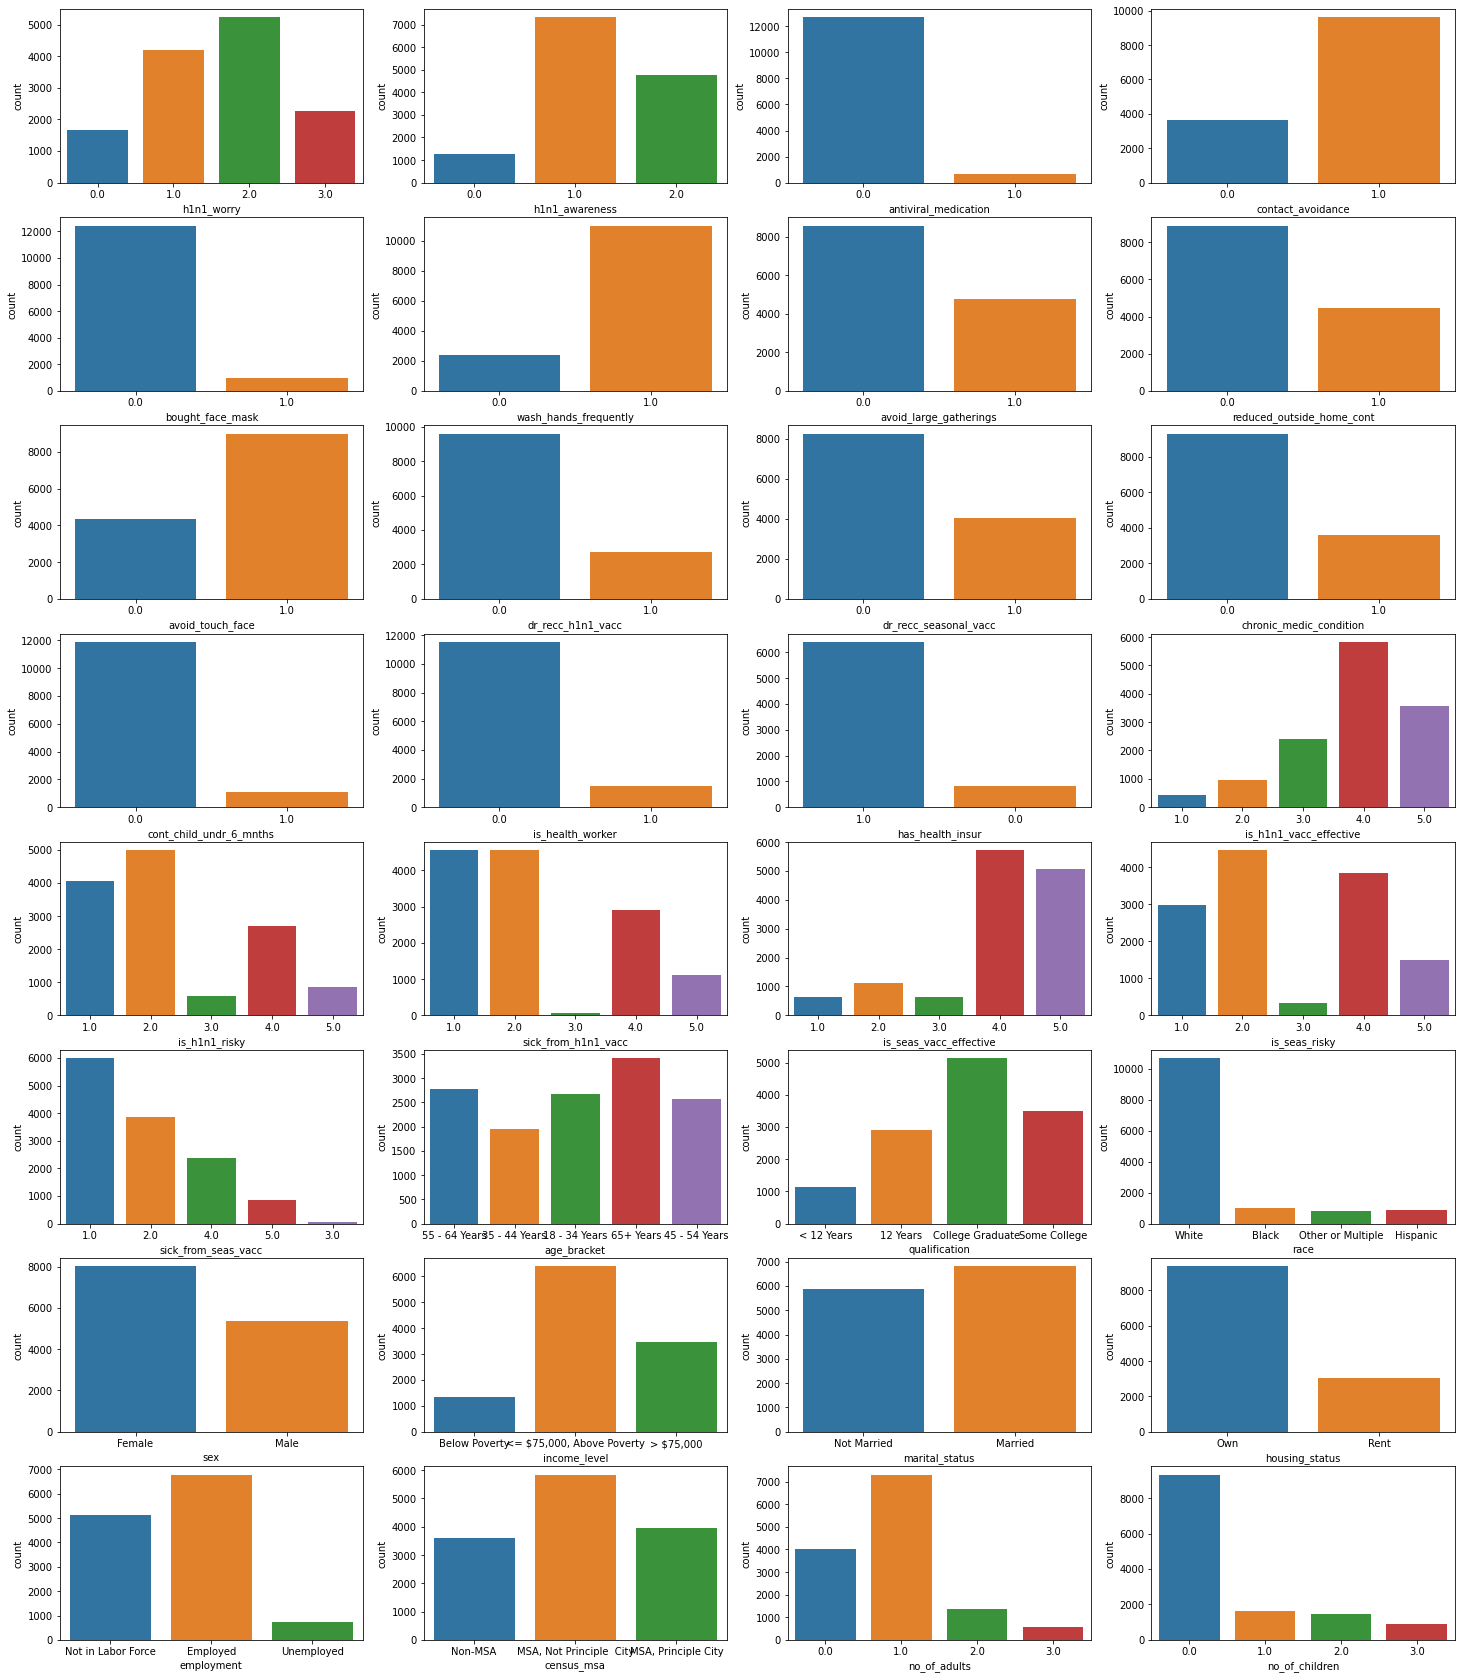

In [ ]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 8, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)

# display the plot
plt.show()

In [ ]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

In [ ]:
class_frequency = df_target.h1n1_vaccine.value_counts()
class_frequency

0.0    10516
1.0     2878
Name: h1n1_vaccine, dtype: int64

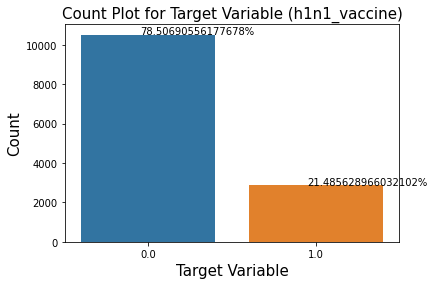

In [ ]:
# plot the countplot of the variable 'h1n1_vaccine'
sns.countplot(x = df_target.h1n1_vaccine)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = df_target.h1n1_vaccine.value_counts()[0] + 30, s = str((class_frequency[0])*100/len(df_target.h1n1_vaccine)) + '%')
plt.text(x = 0.95, y = df_target.h1n1_vaccine.value_counts()[1] +20, s = str((class_frequency[1])*100/len(df_target.h1n1_vaccine)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (h1n1_vaccine)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [ ]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
has_health_insur,6160,45.987309
income_level,2208,16.483763
dr_recc_h1n1_vacc,1061,7.920866
dr_recc_seasonal_vacc,1061,7.920866
housing_status,1027,7.667040
employment,739,5.516984
marital_status,724,5.405002
qualification,717,5.352744
chronic_medic_condition,477,3.561030
cont_child_undr_6_mnths,411,3.068309


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(13395, 33)

In [ ]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac